In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import exp
spark = SparkSession.builder.appName('Bank Telephone Marketing Analysis').getOrCreate() 

In [2]:
df = spark.read.csv("bank-additional-full.csv",inferSchema=True,header=True,sep=";")

In [3]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: string (nullable = true)



In [4]:
import pandas as pd 

In [5]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,41188,40.02406040594348,10.421249980934045,17,98
job,41188,None,None,admin.,unknown
marital,41188,None,None,divorced,unknown
education,41188,None,None,basic.4y,unknown
default,41188,None,None,no,yes
housing,41188,None,None,no,yes
loan,41188,None,None,no,yes
contact,41188,None,None,cellular,telephone
month,41188,None,None,apr,sep


In [6]:
DataY=df.filter("y='yes'") 
DataN=df.filter("y='no'") 

In [51]:
import numpy as np
import matplotlib.pyplot as plt
def ShowGroupAndY2(fields):
    for field in fields:
        ages = sorted(df.select(df[field]).distinct().toPandas()[field])
        N = len(ages)
        ind = np.arange(N)    # the x locations for the groups
        if(len(ages)>0):         
            gap=10;
            if len(ages)>3000:
                gap=1000
            elif len(ages)>300:
                gap=100
            elif gap>20:
                gap=10 
            else:
                gap=1
            MinAges=[ ages[i]   for i in ind if (i%gap==0)]              
            iMinAge=len(MinAges)
            AgeN = [DataN.filter((DataN[field]>=MinAges[i]) & (DataN[field]<MinAges[i+1])).count()*100/df.filter((df[field]>=MinAges[i]) & (df[field]<MinAges[i+1])).count() for i in np.arange(iMinAge-1)] 
            AgeY = [DataY.filter((DataY[field]>=MinAges[i]) & (DataY[field]<MinAges[i+1])).count()*100/df.filter((df[field]>=MinAges[i]) & (df[field]<MinAges[i+1])).count() for i in np.arange(iMinAge-1)]
            AgeN.append(DataN.filter(DataN[field]>=MinAges[iMinAge-1]).count()*100/df.filter(df[field]>=MinAges[iMinAge-1]).count())
            AgeY.append(DataY.filter(DataY[field]>=MinAges[iMinAge-1]).count()*100/df.filter(df[field]>=MinAges[iMinAge-1]).count())
            #if not (N%gap==0):            #    MinAges.append(ages[N-1])            #    AgeN.append(0)            #    AgeY.append(0)
            N=len(MinAges)
        ind = np.arange(N)    # the x locations for the groups
        width = 0.35       # the width of the bars: can also be len(x) sequence    
        p1 = plt.bar(ind, AgeN, width )
        p2 = plt.bar(ind, AgeY, width ,
             bottom=AgeN)

        plt.ylabel('count(*)')
        plt.title('count by group by '+field)
        if len(MinAges)>5:
            plt.xticks(ind, MinAges, rotation='vertical')
        else:
            plt.xticks(ind, MinAges )
        plt.yticks(np.arange(0, 100, 10))
        plt.legend((p1[0], p2[0]), ('No', 'Yes'))
        plt.show()

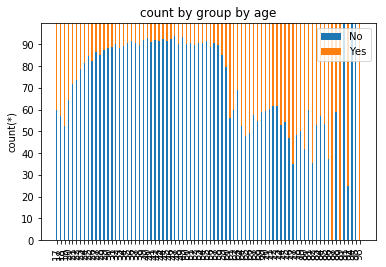

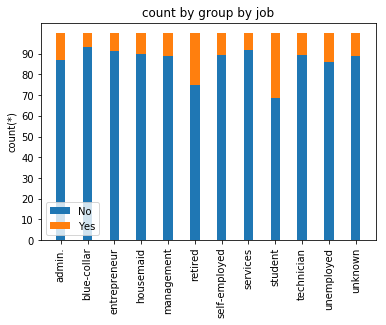

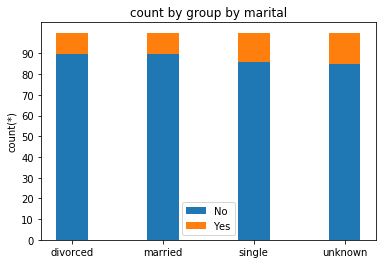

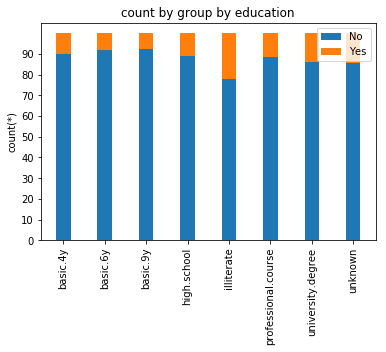

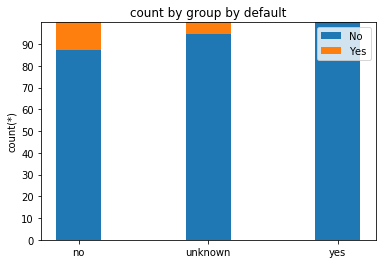

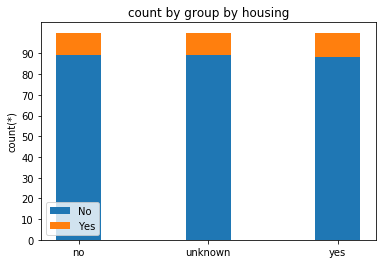

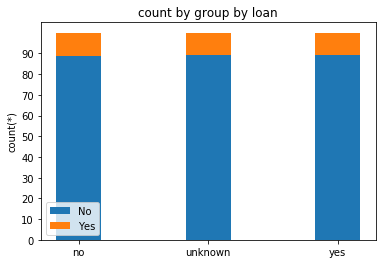

In [52]:
ShowGroupAndY2(['age','job','marital','education','default','housing','loan'])

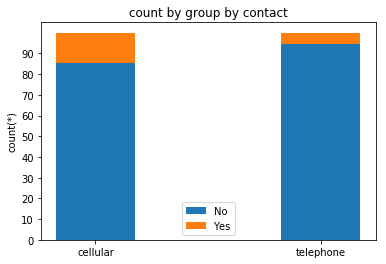

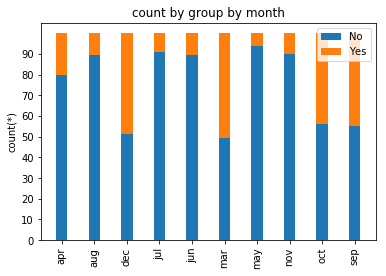

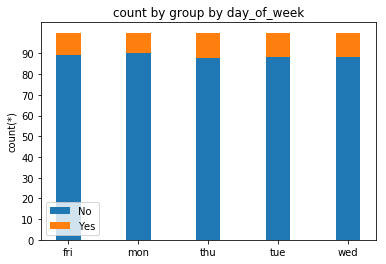

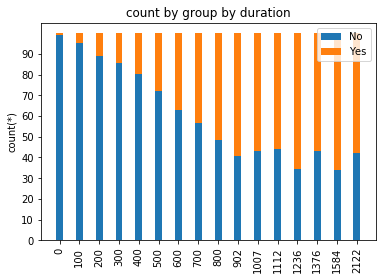

In [48]:
ShowGroupAndY2(['contact','month','day_of_week','duration'])

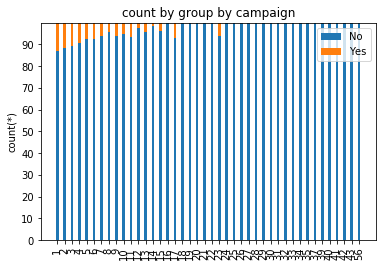

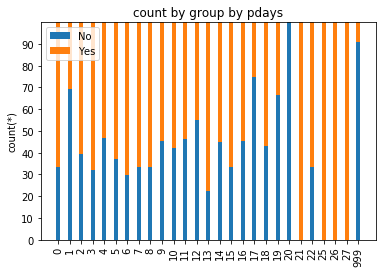

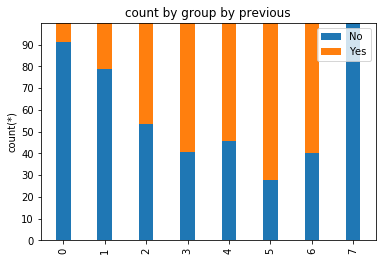

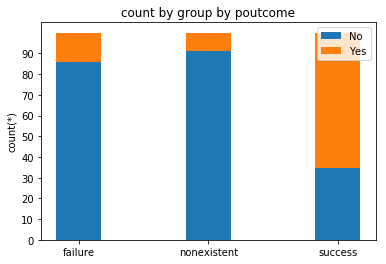

In [49]:
ShowGroupAndY2(['campaign','pdays','previous','poutcome'])

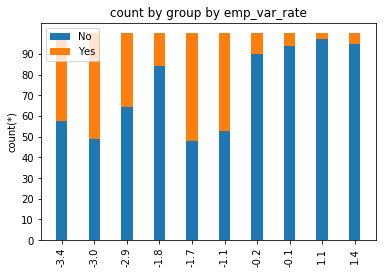

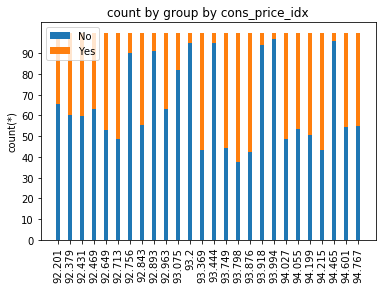

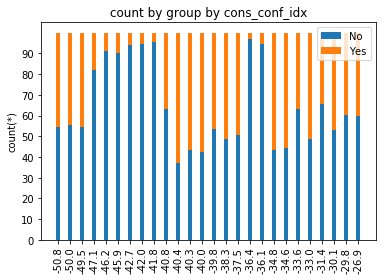

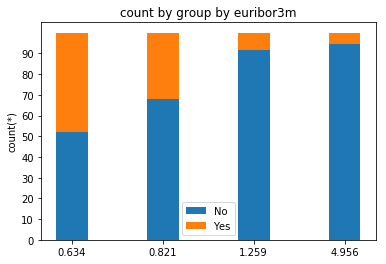

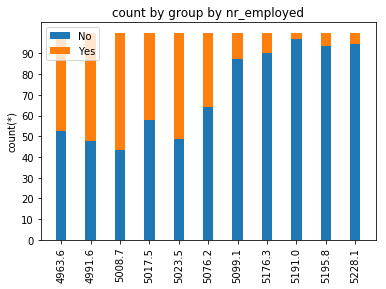

In [50]:
ShowGroupAndY2(['emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']) 

In [55]:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



In [62]:
df.groupby('job').agg({"age":"avg","age":"max","age":"count"}).show()

+-------------+----------+
|          job|count(age)|
+-------------+----------+
|   management|      2924|
|      retired|      1720|
|      unknown|       330|
|self-employed|      1421|
|      student|       875|
|  blue-collar|      9254|
| entrepreneur|      1456|
|       admin.|     10422|
|   technician|      6743|
|     services|      3969|
|    housemaid|      1060|
|   unemployed|      1014|
+-------------+----------+



In [81]:
df.groupby('job').agg({"age":"avg","age":"min"}).show()

+-------------+--------+
|          job|min(age)|
+-------------+--------+
|   management|      21|
|      retired|      23|
|      unknown|      24|
|self-employed|      21|
|      student|      17|
|  blue-collar|      20|
| entrepreneur|      20|
|       admin.|      20|
|   technician|      20|
|     services|      20|
|    housemaid|      21|
|   unemployed|      21|
+-------------+--------+



In [71]:
df

DataFrame[age: int, job: string, marital: string, education: string, default: string, housing: string, loan: string, contact: string, month: string, day_of_week: string, duration: int, campaign: int, pdays: int, previous: int, poutcome: string, emp_var_rate: double, cons_price_idx: double, cons_conf_idx: double, euribor3m: double, nr_employed: double, y: string]

In [82]:
df.select(*)

SyntaxError: invalid syntax (<ipython-input-82-1ab627a10d8a>, line 1)

In [90]:
df.select('*', (df.age ).alias('agePlusTen'))

DataFrame[age: int, job: string, marital: string, education: string, default: string, housing: string, loan: string, contact: string, month: string, day_of_week: string, duration: int, campaign: int, pdays: int, previous: int, poutcome: string, emp_var_rate: double, cons_price_idx: double, cons_conf_idx: double, euribor3m: double, nr_employed: double, y: string, agePlusTen: int]

In [91]:


df_group = df.select('*', (df.age ).alias('age1'))
df_group.groupby("job").agg({"age":"min","age1":"max","y":"count"}).show()

+-------------+--------+--------+---------+
|          job|count(y)|min(age)|max(age1)|
+-------------+--------+--------+---------+
|   management|    2924|      21|       80|
|      retired|    1720|      23|       98|
|      unknown|     330|      24|       81|
|self-employed|    1421|      21|       71|
|      student|     875|      17|       47|
|  blue-collar|    9254|      20|       80|
| entrepreneur|    1456|      20|       69|
|       admin.|   10422|      20|       72|
|   technician|    6743|      20|       70|
|     services|    3969|      20|       69|
|    housemaid|    1060|      21|       85|
|   unemployed|    1014|      21|       66|
+-------------+--------+--------+---------+



In [92]:

df_group.groupby("marital").agg({"age":"min","age1":"max","y":"count"}).show()

+--------+--------+--------+---------+
| marital|count(y)|min(age)|max(age1)|
+--------+--------+--------+---------+
| unknown|      80|      25|       66|
|divorced|    4612|      24|       95|
| married|   24928|      20|       98|
|  single|   11568|      17|       86|
+--------+--------+--------+---------+



In [93]:

df_group.groupby("education").agg({"age":"min","age1":"max","y":"count"}).show()

+-------------------+--------+--------+---------+
|          education|count(y)|min(age)|max(age1)|
+-------------------+--------+--------+---------+
|        high.school|    9515|      18|       88|
|            unknown|    1731|      17|       92|
|           basic.6y|    2292|      18|       95|
|professional.course|    5243|      20|       86|
|  university.degree|   12168|      20|       91|
|         illiterate|      18|      34|       80|
|           basic.4y|    4176|      18|       98|
|           basic.9y|    6045|      17|       94|
+-------------------+--------+--------+---------+



In [94]:
def del_unknown(data):
    # fill_attrs = ["default"]
    del_attrs = ['job','marital','education','housing','loan']
    for i in del_attrs: 
        # delete col containing unknown
        data = data[data[i] != "unknown"]  
    return data

In [95]:
df=del_unknown(df)

In [100]:
df=df.replace({'job':{'admin.':'admin'}})

TypeError: replace() missing 1 required positional argument: 'value'

In [99]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,38245,39.86087070205256,10.28948817544409,17,98
job,38245,None,None,admin.,unemployed
marital,38245,None,None,divorced,single
education,38245,None,None,basic.4y,university.degree
default,38245,None,None,no,yes
housing,38245,None,None,no,yes
loan,38245,None,None,no,yes
contact,38245,None,None,cellular,telephone
month,38245,None,None,apr,sep
